##Model3_TL - Transfer learning using ConvNext

by Kaushik Srivatsan - CDS - kaushik.s-25@scds.saiuniversity.edu.in


*   Trained on Hutton Rock Dataset
*   Model contains Dropout of 0.15% Drop Rate before output layer





In [1]:
#importing the file
import zipfile
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/DL_Project/Hutton_Rock.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/DL_Project/")
# zip_ref.close()

In [2]:
#Importing the libraries
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


In [3]:
#Importing the images using glob as ImgFiles
imgFiles = glob.glob("/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/*/*.jpg")
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/1.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/125.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/106.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/117.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/127.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/116.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/10.jpg
/content/drive/MyDrive/DL_Main/DL_Project/Hutton_Rock/granite/12.jpg


###Data Preprocessing and Labelling

In [4]:
X = []
y = []

for fName in imgFiles:

  # Prepare the dataset and populate X and y
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  X_i = (np.array(X_i).astype(np.float32) /127.5) - 1
        # X.append(X_i)

      # label = fName.split("/")
      # y_i = label[-2]

      # y.append(y_i)

  if X_i.shape == (299, 299, 3):
      X.append(X_i)

      label = fName.split("/")
      y_i = label[-2]

      y.append(y_i)

In [ ]:
print(y)

['granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite', 'granite'

In [5]:
class_counts = dict()

# Count images for each class
for file_path in imgFiles:
    class_name = file_path.split("/")[-2]
    if class_name not in class_counts:
        class_counts[class_name] = 1
    else:
        class_counts[class_name] += 1

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: granite, Count: 187
Class: basalt, Count: 130
Class: andesite, Count: 103
Class: coal, Count: 85


In [6]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)


{0, 1, 2, 3}
['andesite' 'basalt' 'coal' 'granite']


In [7]:

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(498, 299, 299, 3)
(498,)


###Splitting the Data using sklearn

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)


print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (373, 299, 299, 3)
X_test_shape: (125, 299, 299, 3)


###Data Normalization

In [9]:
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

In [10]:
X_train_std.shape

(373, 299, 299, 3)

In [11]:
y_train.shape

(373,)

In [12]:
print(X_train)

[[[[ 0.27843142  0.2941177   0.254902  ]
   [ 0.27843142  0.2941177   0.254902  ]
   [ 0.27058828  0.28627455  0.24705887]
   ...
   [ 0.12941182  0.12941182  0.12941182]
   [ 0.04313731  0.04313731  0.04313731]
   [ 0.01176476  0.01176476  0.01176476]]

  [[ 0.27843142  0.2941177   0.254902  ]
   [ 0.27843142  0.2941177   0.254902  ]
   [ 0.27843142  0.2941177   0.254902  ]
   ...
   [ 0.16078436  0.16078436  0.16078436]
   [ 0.082353    0.082353    0.082353  ]
   [ 0.05098045  0.05098045  0.05098045]]

  [[ 0.27843142  0.2941177   0.254902  ]
   [ 0.28627455  0.30196083  0.26274514]
   [ 0.2941177   0.30980396  0.27058828]
   ...
   [ 0.23921573  0.2313726   0.23921573]
   [ 0.17647064  0.17647064  0.17647064]
   [ 0.15294123  0.15294123  0.15294123]]

  ...

  [[ 0.07450986  0.02745104  0.02745104]
   [ 0.082353    0.03529418  0.03529418]
   [ 0.09019613  0.04313731  0.04313731]
   ...
   [-0.04313725 -0.08235294 -0.05098039]
   [-0.09019607 -0.12941176 -0.09803921]
   [-0.10588235 

### Transfer Learning - Using ConvextTiny

In [13]:
base_convnext = keras.applications.ConvNeXtTiny(weights='imagenet', input_shape = (299,299,3), include_top=False)

111650432/111650432 [==============================] - 6s 0us/step


In [14]:
base_convnext.trainable = False

In [15]:
for layer in base_convnext.layers:
  layer.trainabe = False


### Building the Classifier

In [16]:

global_pool = keras.layers.GlobalAveragePooling2D()(base_convnext.output)
x = keras.layers.Dropout(0.15)(global_pool)

output_ = keras.layers.Dense(units=4, activation='softmax')(x)
model_TL3 = keras.models.Model(inputs=[base_convnext.input], outputs=[output_])

### Training the Model

In [17]:

model_TL3.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

callbacks_TL = [keras.callbacks.ModelCheckpoint("bestM3TL.h5",monitor='val_accuracy',save_weights_only=True,save_best_only=True)]

history_TL = model_TL3.fit(x = X_train_std, y = y_train, epochs=10, batch_size = 16, validation_split=0.1, callbacks = callbacks_TL)

Epoch 1/10
21/21 [==============================] - 29s 661ms/step - loss: 1.6515 - accuracy: 0.2836 - val_loss: 1.3718 - val_accuracy: 0.2895
Epoch 2/10
21/21 [==============================] - 5s 247ms/step - loss: 1.2722 - accuracy: 0.4269 - val_loss: 1.2349 - val_accuracy: 0.3684
Epoch 3/10
21/21 [==============================] - 6s 267ms/step - loss: 1.1728 - accuracy: 0.5224 - val_loss: 1.1647 - val_accuracy: 0.4211
Epoch 4/10
21/21 [==============================] - 5s 256ms/step - loss: 1.1018 - accuracy: 0.5522 - val_loss: 1.1095 - val_accuracy: 0.4474
Epoch 5/10
21/21 [==============================] - 5s 238ms/step - loss: 1.0595 - accuracy: 0.5821 - val_loss: 1.0532 - val_accuracy: 0.4211
Epoch 6/10
21/21 [==============================] - 6s 269ms/step - loss: 1.0118 - accuracy: 0.5821 - val_loss: 1.0244 - val_accuracy: 0.4737
Epoch 7/10
21/21 [==============================] - 5s 258ms/step - loss: 1.0002 - accuracy: 0.5582 - val_loss: 0.9767 - val_accuracy: 0.5526
Epoch

### Testing the Model using Best Weights

In [18]:
model_TL3.load_weights("bestM3TL.h5")

testLoss_TL, testAccuracy_TL = model_TL3.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

4/4 [==============================] - 8s 1s/step - loss: 0.8504 - accuracy: 0.7120
Test-loss: 0.850352, Test-accuracy: 0.712000


###Checking the performance

In [19]:
y_proba = model_TL3.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)

4/4 [==============================] - 4s 391ms/step


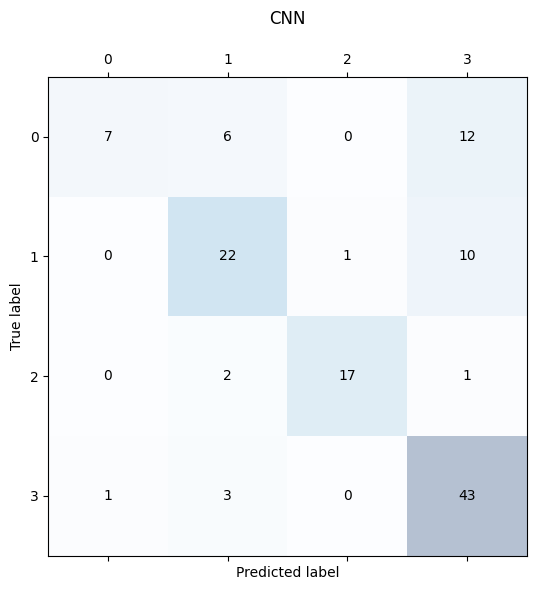

{0, 1, 2, 3}
['andesite' 'basalt' 'coal' 'granite']


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(set(y))
print(lEncoder.classes_)


### Saving the Model

In [21]:
model_TL3.save('/content/drive/MyDrive/Models/Model3_TL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from numpy import save

save('/content/drive/MyDrive/Models/X_train_std_model3.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std_model3.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train_model3.npy', y_train)
save('/content/drive/MyDrive/Models/y_test_model3.npy', y_test)